# Densité de population médecins/département/spécialité...

## Setup

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import re

%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(14,8) # Defini la taille des figures
plt.style.use('ggplot') # Style predefini pour l'affichage des figures

## Load data

In [2]:
# Clean departement
def clean_departement(x):
    return str(x).split('- ')[1]

In [3]:
# Densité de population médecins/département/spécialité...
df = pd.read_csv('med_gen.csv', sep=';', converters={'DEPARTEMENT': clean_departement})
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.set_index('Index', inplace=True)
df.dropna(how='any', inplace=True)
df.head()

,Type,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
Index,,,,,,,,,,
0,01- Médecine générale,Ain,387,627405.0,61.682645,387,54708468.0,544536.0,273568.0,55526572.0
1,01- Médecine générale,Aisne,370,540409.0,68.466661,370,64692167.0,316633.0,357630.0,65366430.0
2,01- Médecine générale,Allier,249,342593.0,72.680995,249,36055432.0,55748.0,368883.0,36480063.0
3,01- Médecine générale,Alpes-Hte-Provence,159,162438.0,97.883500,159,22188985.0,101450.0,341958.0,22632393.0
4,01- Médecine générale,Hautes-Alpes,152,141911.0,107.109385,152,19210311.0,259858.0,179646.0,19649815.0


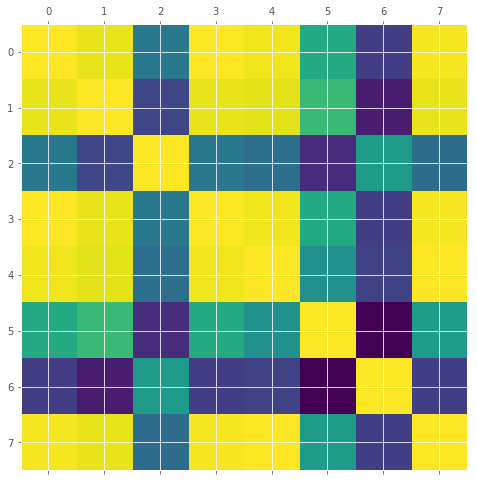

In [9]:
plt.matshow(df.corr())

## Densite / Depassement

In [4]:
df_densite_depassement = df[["DENSITE /100 000 hab.", "DEPASSEMENTS (Euros)"]]
df_densite_depassement.sort_values(by="DENSITE /100 000 hab.", axis=0, ascending=True, inplace=True) 
df_densite_depassement.head()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DENSITE /100 000 hab.,DEPASSEMENTS (Euros)
Index,,
93,56.686351,2222027.0
91,60.056907,4005946.0
77,60.505931,7399177.0
89,60.754768,591355.0
28,60.802966,410969.0


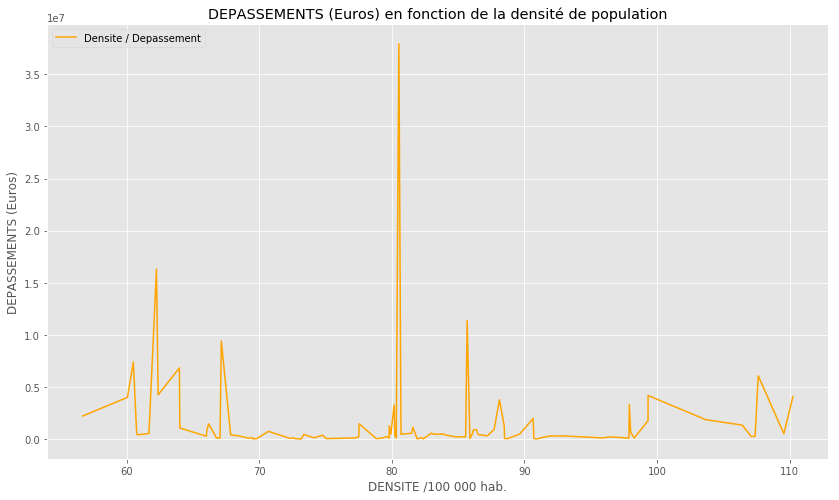

In [5]:
x = df_densite_depassement["DENSITE /100 000 hab."]
y = df_densite_depassement["DEPASSEMENTS (Euros)"]

plt.plot(x, y, label="Densite / Depassement", color="orange")
plt.title("DEPASSEMENTS (Euros) en fonction de la densité de population")
plt.xlabel("DENSITE /100 000 hab."), plt.ylabel("DEPASSEMENTS (Euros)")
plt.legend(loc=2)
plt.show()


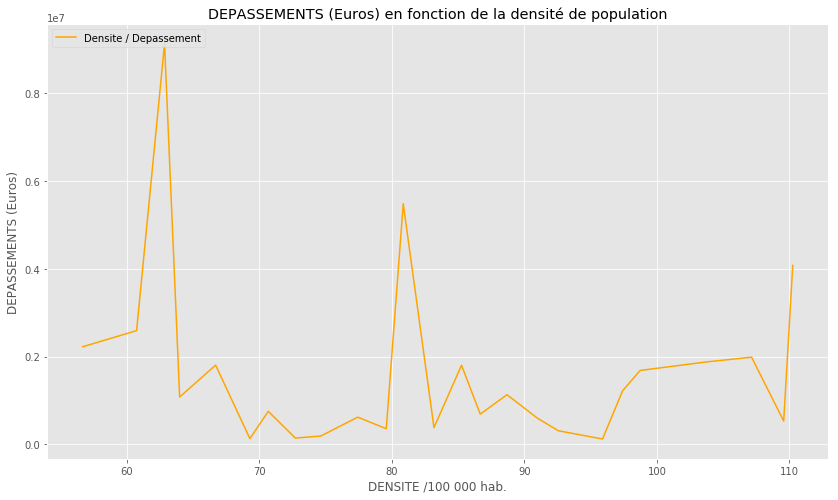

In [6]:
df_test = df_densite_depassement.groupby(pd.cut(df["DENSITE /100 000 hab."], np.arange(0, 140, 2))).mean()
df_test.dropna(how='any', inplace=True)

x = df_test["DENSITE /100 000 hab."]
y = df_test["DEPASSEMENTS (Euros)"]

plt.plot(x, y, label="Densite / Depassement", color="orange")
plt.title("DEPASSEMENTS (Euros) en fonction de la densité de population")
plt.xlabel("DENSITE /100 000 hab."), plt.ylabel("DEPASSEMENTS (Euros)")
plt.legend(loc=2)
plt.show()


## Densite / Frais de deplacement (Euros)

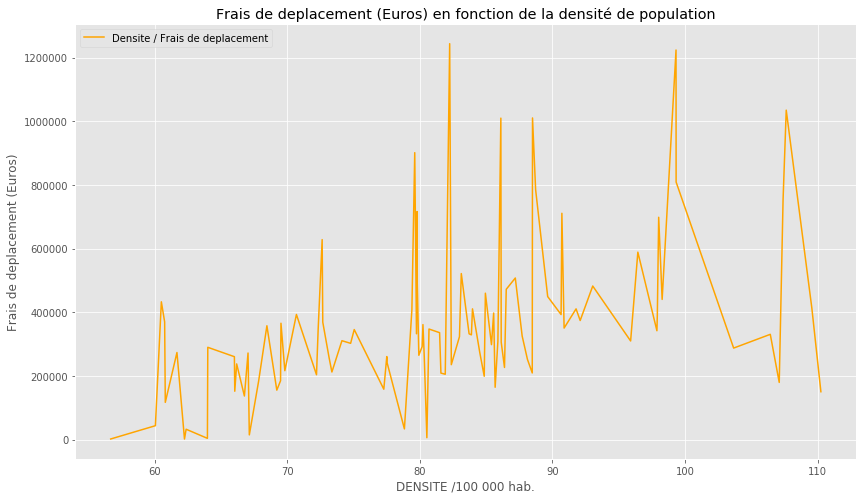

In [7]:
df.sort_values(by="DENSITE /100 000 hab.", axis=0, ascending=True, inplace=True) 

x = df["DENSITE /100 000 hab."]
y = df["FRAIS DE DEPLACEMENT (Euros)"]

plt.plot(x, y, label="Densite / Frais de deplacement", color="orange")
plt.title("Frais de deplacement (Euros) en fonction de la densité de population")
plt.xlabel("DENSITE /100 000 hab."), plt.ylabel("Frais de deplacement (Euros)")
plt.legend(loc=2)
plt.show()


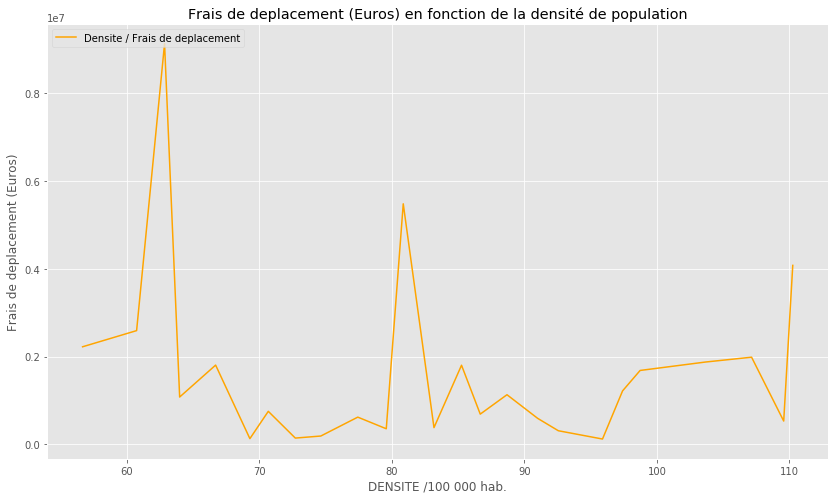

In [8]:
df_test = df.groupby(pd.cut(df["DENSITE /100 000 hab."], np.arange(0, 140, 2))).mean()
df_test.dropna(how='any', inplace=True)

x = df_test["DENSITE /100 000 hab."]
y = df_test["DEPASSEMENTS (Euros)"]

plt.plot(x, y, label="Densite / Frais de deplacement", color="orange")
plt.title("Frais de deplacement (Euros) en fonction de la densité de population")
plt.xlabel("DENSITE /100 000 hab."), plt.ylabel("Frais de deplacement (Euros)")
plt.legend(loc=2)
plt.show()